In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import category_encoders as ce
from sklearn.model_selection import train_test_split   # Used for splitting arrays or matrices into train and test subsets.
from sklearn.neighbors import KNeighborsClassifier     # Used for implementing the k-nearest neighbors value. 
from sklearn.metrics import confusion_matrix           # Used for evaluate the accuracy of a model.
from sklearn.metrics import classification_report      # Used for building a text report.

df=pd.read_csv(r'C:\Users\HP\diabetes.csv')
print(df.head())
print(df.tail())
print(df.info())
print(df.describe())
print(df.nunique())

   slno  gender   age  hypertension  heart_disease smoking_history    bmi  \
0     1  Female  80.0           0.0            1.0           never  25.19   
1     2  Female  54.0           0.0            0.0         No Info  27.32   
2     3    Male  28.0           0.0            0.0           never  27.32   
3     4  Female  36.0           0.0            0.0         current  23.45   
4     5    Male  76.0           1.0            1.0         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  height  weight  
0          6.6                  140         0  171.52   74.11  
1          6.6                   80         0  176.48   83.74  
2          5.7                  158         0  163.29   58.46  
3          5.0                  155         0  187.04   52.77  
4          4.8                  155         0  154.72   68.39  
     slno  gender   age  hypertension  heart_disease smoking_history    bmi  \
695   696  Female  62.0           0.0            0.0            ever  27.2

In [2]:
# Check for missing values in the dataset
# Impute missing values with the mean for numerical columns and mode for categorical columns

print(df.isnull().sum())
print(df.isnull().mean()*100)
for col in df.columns :
    if(df[col].dtype=="object"):
        df[col].fillna(df[col].mode()[0],inplace=True)
    else : 
        df[col].fillna(df[col].median(),inplace=True)
print(df.isnull().sum())

# Interpretation:
# - Ensure that no missing values remain after the imputation process.
# - Helps to confirm that the missing values were handled properly

slno                   0
gender                 3
age                    5
hypertension           2
heart_disease          1
smoking_history        5
bmi                    3
HbA1c_level            2
blood_glucose_level    0
diabetes               0
height                 0
weight                 0
dtype: int64
slno                   0.000000
gender                 0.428571
age                    0.714286
hypertension           0.285714
heart_disease          0.142857
smoking_history        0.714286
bmi                    0.428571
HbA1c_level            0.285714
blood_glucose_level    0.000000
diabetes               0.000000
height                 0.000000
weight                 0.000000
dtype: float64
slno                   0
gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
height                 0
weight       

In [3]:
# Remove the column 'sl.no'
df.drop(columns=['slno'], inplace=True)
print("\nColumns after removing 'sl.no':")
print(df.columns)


Columns after removing 'sl.no':
Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes', 'height',
       'weight'],
      dtype='object')


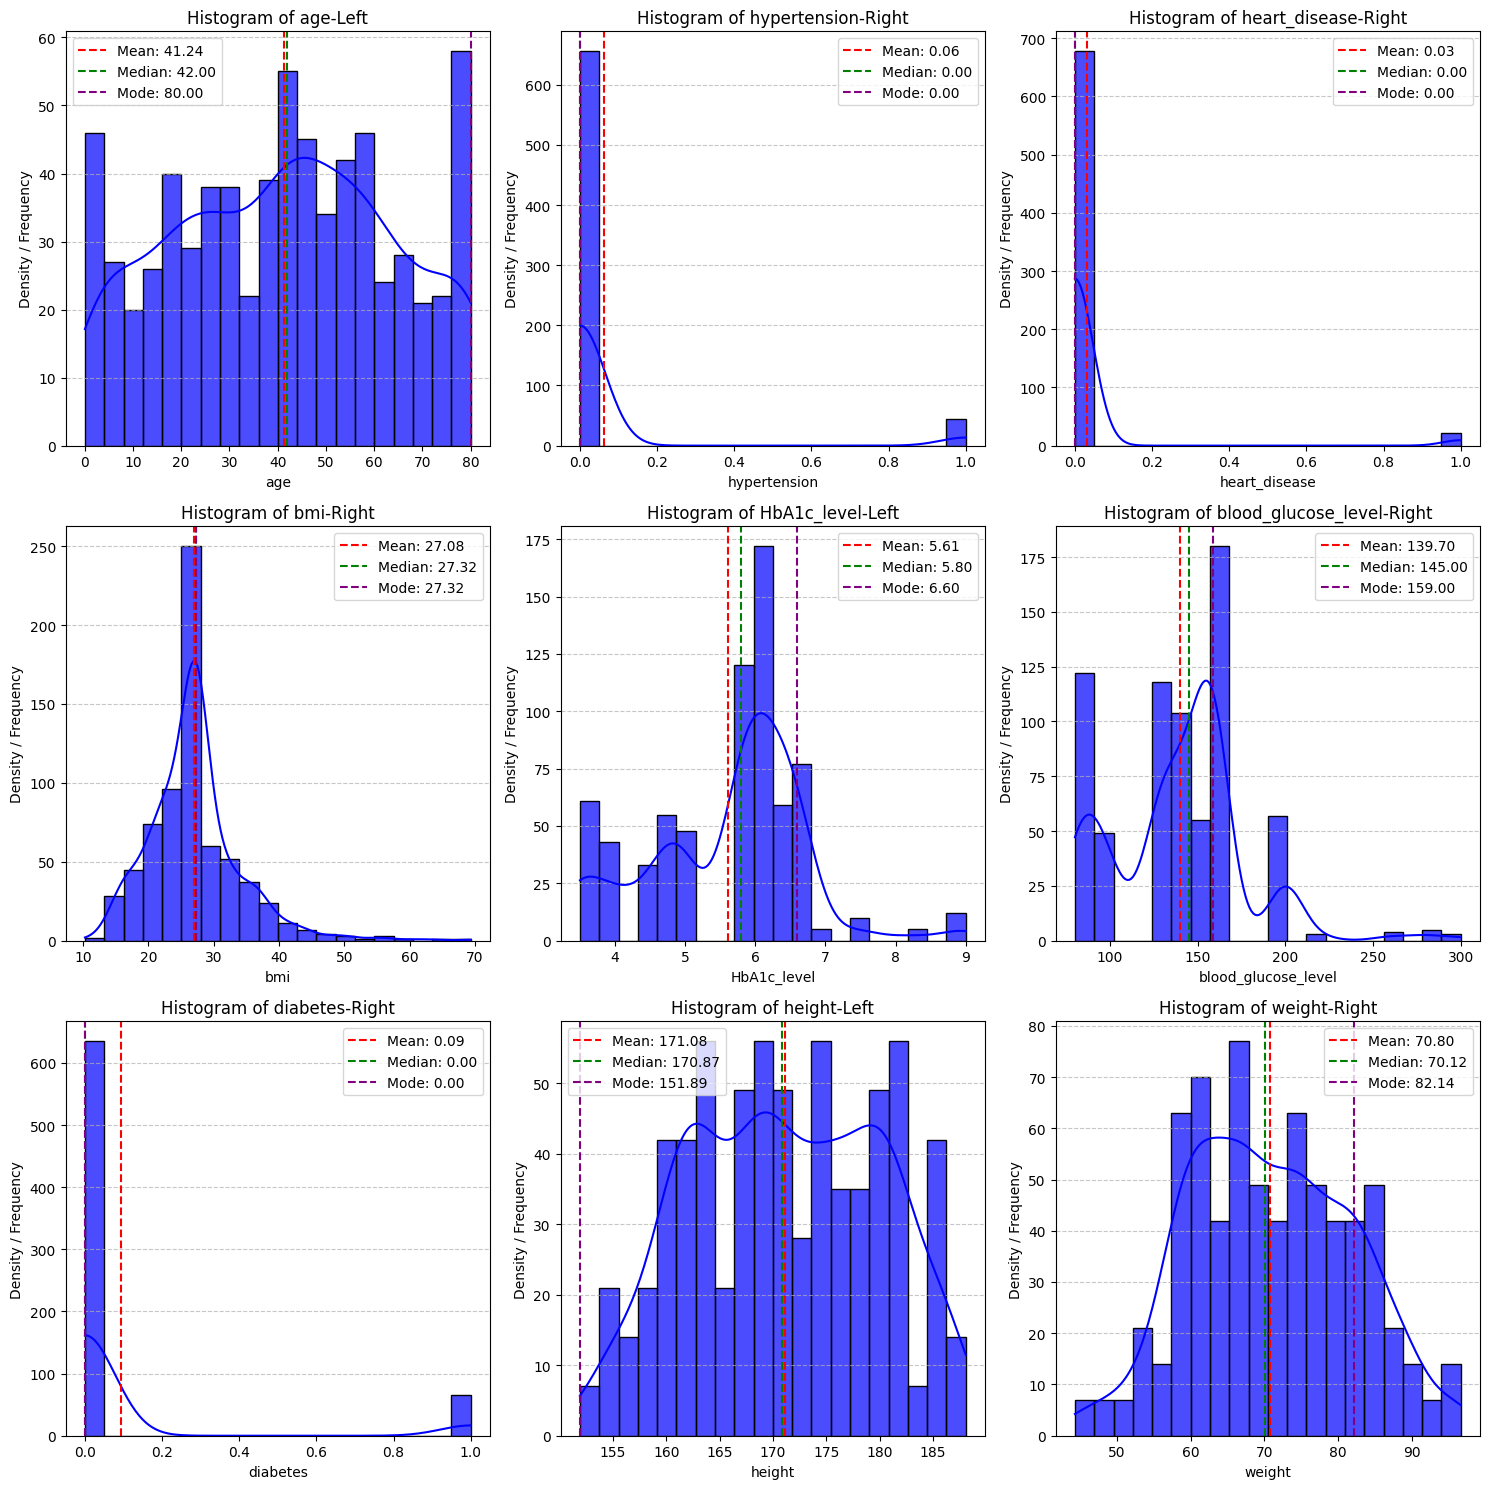

In [4]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
rows = (len(numerical_columns) // 3) + (1 if len(numerical_columns) % 3 != 0 else 0)
cols = min(len(numerical_columns), 3)

# Plot histograms and check skewness for all numerical columns
plt.figure(figsize=(15, rows * 5))
for i, col in enumerate(numerical_columns, 1):
    # Mean, Median, and Skewness Calculation
    mean = df[col].mean()
    median = df[col].median()
    skewness = df[col].skew()

    # Determine skewness type
    if skewness > 0:
        skew='Right'
    elif skewness < 0:
        skew='Left'
    else:
        skew='No skew'

    plt.subplot(rows, cols, i)  
    sns.histplot(df[col], kde=True, bins=20, color='blue', alpha=0.7)
    
    # Add mean, median, and mode lines
    mode_val = df[col].mode()[0]
    plt.axvline(mean, color='red', linestyle='--', label=f'Mean: {mean:.2f}')
    plt.axvline(median, color='green', linestyle='--', label=f'Median: {median:.2f}')
    plt.axvline(mode_val, color='purple', linestyle='--', label=f'Mode: {mode_val:.2f}')
    
    # Titles and labels
    plt.title(f"Histogram of {col}-{skew}")
    plt.xlabel(col)
    plt.ylabel("Density / Frequency")
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

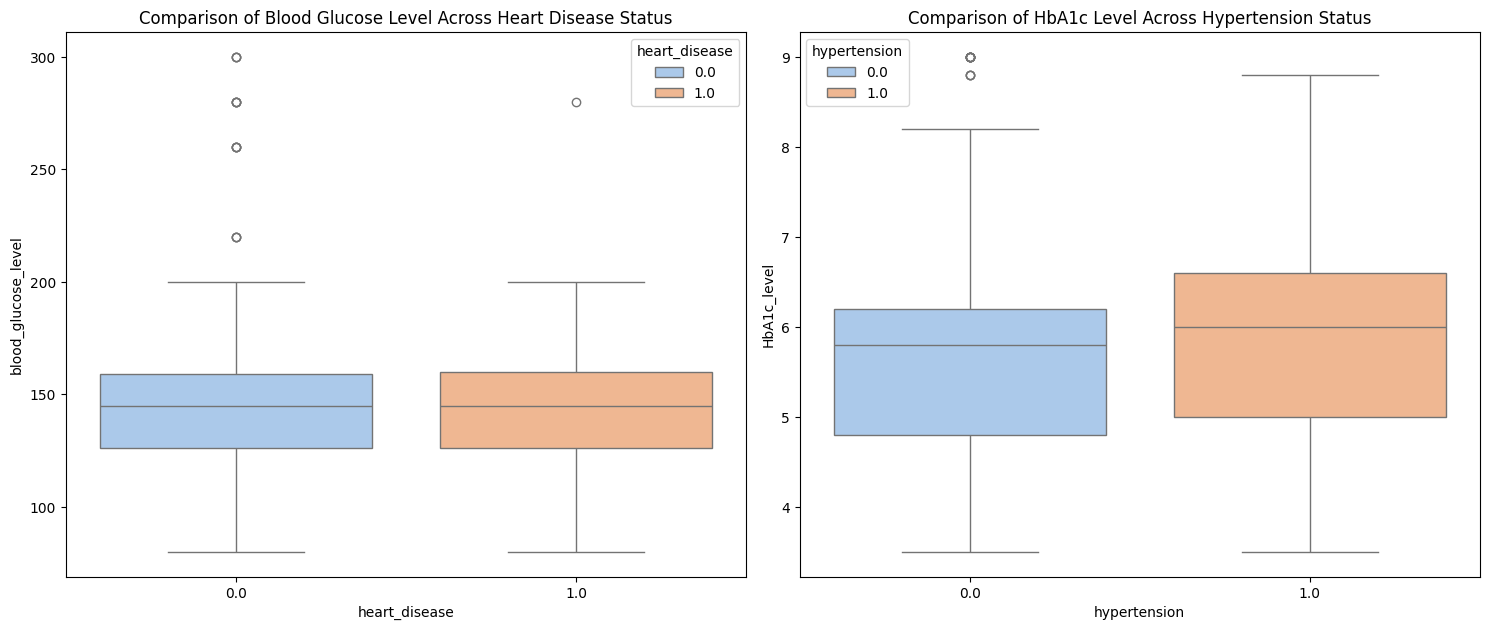

In [5]:
# Set the pastel color palette
sns.set_palette("pastel")

# Create a figure with 2 rows and 2 columns for boxplots
plt.figure(figsize=(15, 12))

# Boxplot 2: Comparison of HbA1c Level across Hypertension status
plt.subplot(2, 2, 2)
sns.boxplot(x='hypertension', y='HbA1c_level', data=df, hue='hypertension')
plt.title('Comparison of HbA1c Level Across Hypertension Status')

# Boxplot 3: Comparison of Blood Glucose Level across Heart Disease status
plt.subplot(2, 2, 1)
sns.boxplot(x='heart_disease', y='blood_glucose_level', data=df, hue='heart_disease')
plt.title('Comparison of Blood Glucose Level Across Heart Disease Status')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

#Outliers:Dots represent outliers in the boxplot
#Median (Central Line): The line inside the box
#Interquartile Range (IQR): The distance between the 1st quartile (Q1) and 3rd quartile (Q3), which makes up the box
#Whiskers: Lines that extend from the box to the smallest and largest values within 1.5 times the IQR from the lower and upper quartiles.
#Interpretation : 


C:\Users\HP\AppData\Local\Temp\ipykernel_1764\2620620321.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette='pastel')
C:\Users\HP\AppData\Local\Temp\ipykernel_1764\2620620321.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette='pastel')


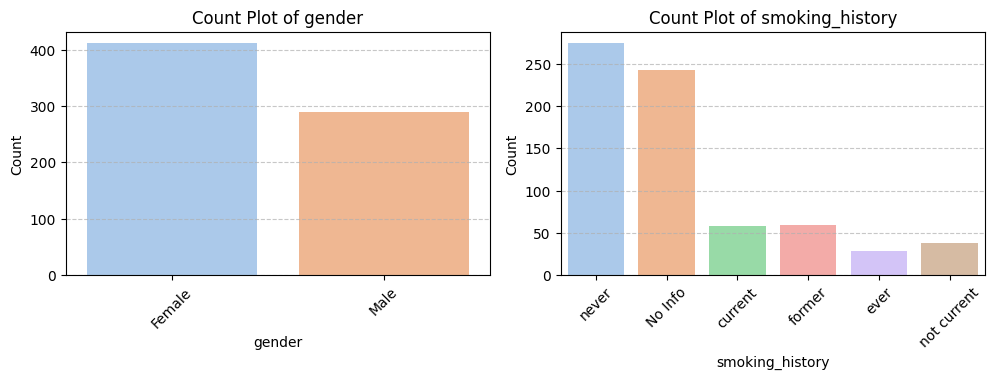

In [6]:
# Univariate Analysis - Count plots for categorical columns

categorical_columns = df.select_dtypes(include=['object']).columns
# Plotting count plots for all categorical columns in one figure
plt.figure(figsize=(15, 10))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(3, 3, i) 
    sns.countplot(x=column, data=df, palette='pastel')
    plt.title(f"Count Plot of {column}")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()
#INterpretation : emake patients are more and mahorit has never smoking peoples

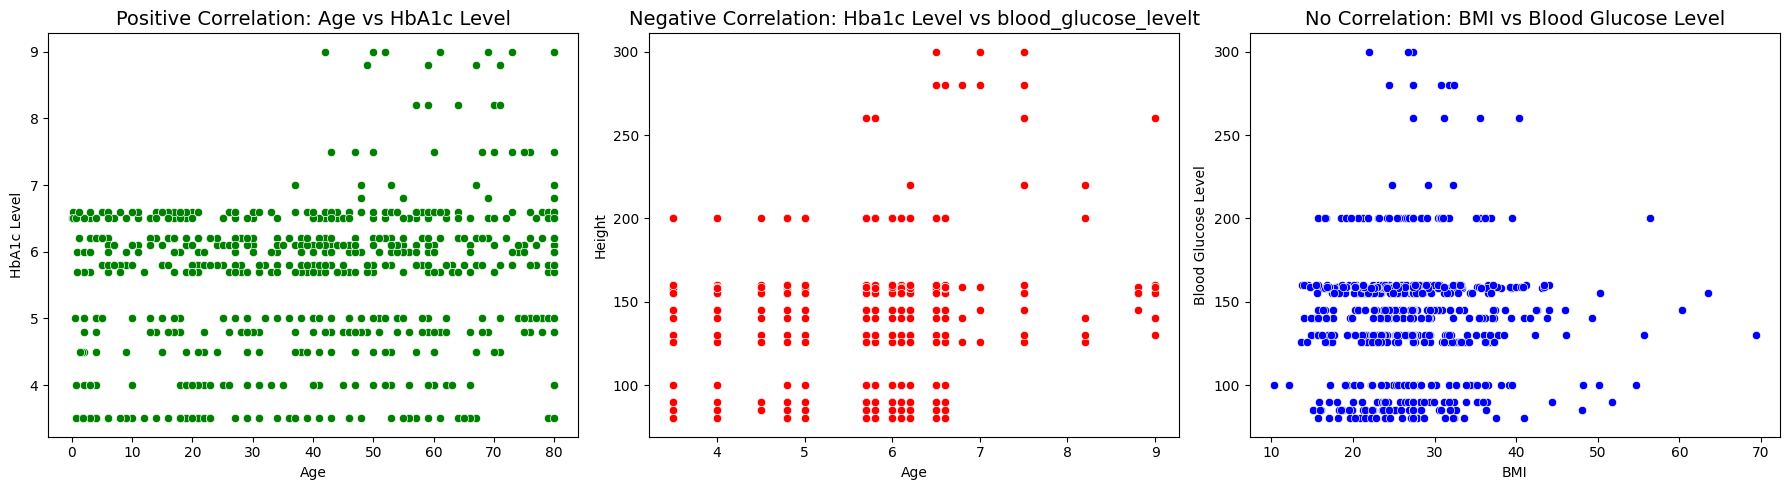

In [7]:
# Positive Correlation (e.g., age vs. HbA1c_level)
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(x='age', y='HbA1c_level', data=df, color='green')
plt.title('Positive Correlation: Age vs HbA1c Level', fontsize=14)
plt.xlabel('Age')
plt.ylabel('HbA1c Level')

# Negative Correlation (e.g., age vs. height)
plt.subplot(1, 3, 2)
sns.scatterplot(x='HbA1c_level', y='blood_glucose_level', data=df, color='red')
plt.title('Negative Correlation: Hba1c Level vs blood_glucose_levelt', fontsize=14)
plt.xlabel('Age')
plt.ylabel('Height')

# No Correlation (e.g., gender vs. BMI as an example if categorical, but can be extended)
plt.subplot(1, 3, 3)
sns.scatterplot(x='bmi', y='blood_glucose_level', data=df, color='blue')
plt.title('No Correlation: BMI vs Blood Glucose Level', fontsize=14)
plt.xlabel('BMI')
plt.ylabel('Blood Glucose Level')

plt.tight_layout()
plt.show()
#positive Correlation: As one variable increases, so does the other (Age and HbA1c).
#Negative Correlation: As one variable increases, the other decreases (Hba1c and blood glucose).
#No Correlation: No clear trend or pattern exists between the two variables (BMI and Blood Glucose Level).

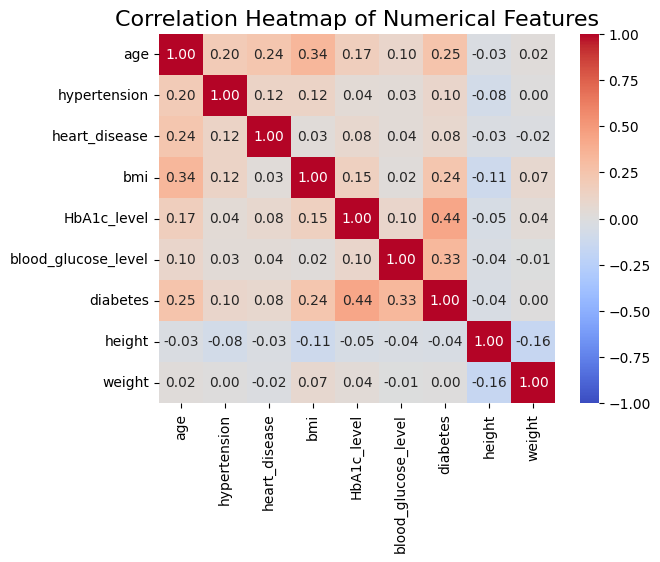

In [8]:
# Correlation heatmap for numerical columns in the dataset
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df[numerical_columns].corr()

# Multivariate - Heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap of Numerical Features", fontsize=16)
plt.show()
#The heatmap will display a grid where each cell represents the correlation between two variables.
    #Positive correlations are highlighted in shades of blue.
    #Negative correlations are in shades of red.
    #A correlation of 0 will be neutral (often white or gray)

In [9]:
from sklearn.preprocessing import LabelEncoder
# Encoding categorical features
df["gender"] = LabelEncoder().fit_transform(df['gender'])
df["smoking_history"] = LabelEncoder().fit_transform(df['smoking_history'])
print(df)

     gender   age  hypertension  heart_disease  smoking_history    bmi  \
0         0  80.0           0.0            1.0                4  25.19   
1         0  54.0           0.0            0.0                0  27.32   
2         1  28.0           0.0            0.0                4  27.32   
3         0  36.0           0.0            0.0                1  23.45   
4         1  76.0           1.0            1.0                1  20.14   
..      ...   ...           ...            ...              ...    ...   
695       0  62.0           0.0            0.0                2  27.27   
696       0  53.0           0.0            0.0                2  42.40   
697       0  55.0           0.0            0.0                4  35.42   
698       0  64.0           0.0            0.0                2  49.27   
699       0  40.0           0.0            0.0                4  31.16   

     HbA1c_level  blood_glucose_level  diabetes  height  weight  
0            6.6                  140        

In [12]:
X=df.drop('diabetes',axis=1).values  #independent variable - features
y=df['diabetes'].values   #dependent variable - target

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=21, stratify=y)

#test_size=0.4 : 40% testing ,60% training 
#random state : ensures that the data is split in the same way every time you run the code.
#stratify=y  :  both the training and testing sets have a similar proportion of 0's and 1's

In [36]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

# Train Gaussian Naive Bayes Classifier
model = GaussianNB()
model.fit(X_train, y_train);
# Make predictions
y_pred_gnb = model.predict(X_test)

# Train Multinomial Naive Bayes Classifier
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
# Make predictions
y_pred_mnb = mnb.predict(X_test)

In [41]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    classification_report,
)

y_pred = model.predict(X_test)

accuray = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")
print("Gaussian Naive Byes Accuracy :", accuray)
print("Gaussian F1 Score:", f1)

# Accuracy score
accuracy_mnb = accuracy_score(y_test, y_pred_mnb)
print(f"\nMultinomial Naive Bayes Accuracy: {accuracy_mnb}")

Gaussian Naive Byes Accuracy : 0.9392857142857143
Gaussian F1 Score: 0.9387728140268052

Multinomial Naive Bayes Accuracy: 0.8142857142857143


In [43]:
labels = ["Has diabetes", "No Diabetes"]
# Confusion Matrix
conf_matrix_gnb = confusion_matrix(y_test, y_pred_gnb)
print("Confusion Matrix for Gaussian Naive Bayes:")
print(conf_matrix_gnb)

# Confusion matrix for Multinomial Naive Bayes
conf_matrix_mnb = confusion_matrix(y_test, y_pred_mnb)
labels = ["Has diabetes", "No Diabetes"]
print("Confusion Matrix for Multinomial Naive Bayes:")
print(conf_matrix_mnb)

Confusion Matrix for Gaussian Naive Bayes:
[[245   9]
 [  8  18]]
Confusion Matrix for Multinomial Naive Bayes:
[[212  42]
 [ 10  16]]


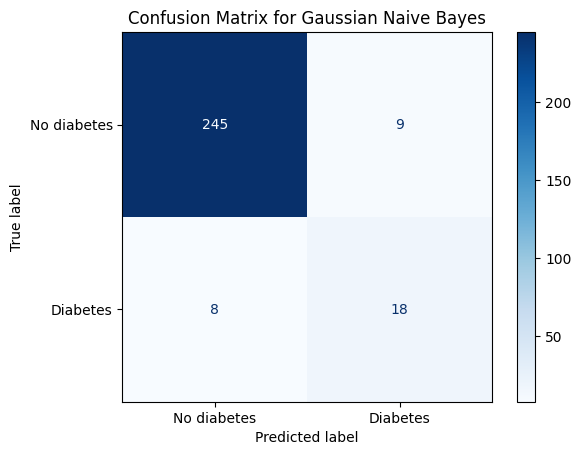

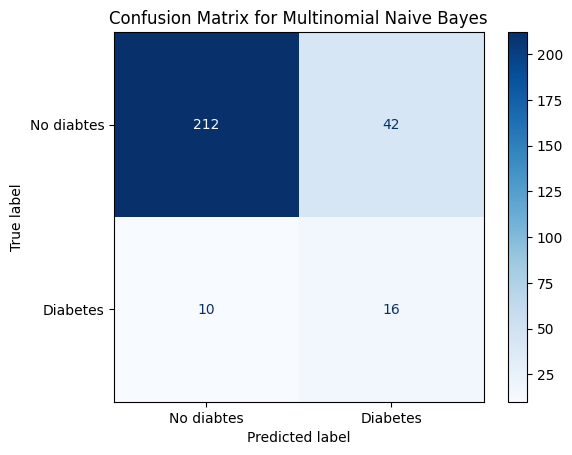

In [42]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion matrix for Gaussian Naive Bayes
cm_gnb = confusion_matrix(y_test, y_pred_gnb)
labels = ["No diabetes", "Diabetes"]
# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_gnb, display_labels=labels)
disp.plot(cmap='Blues', values_format='d')  # values_format='d' to show integers
plt.title("Confusion Matrix for Gaussian Naive Bayes")
plt.show()


# Confusion matrix for Multinomial Naive Bayes
conf_matrix_mnb = confusion_matrix(y_test, y_pred_mnb)
labels = ["No diabtes", "Diabetes"]
# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_mnb, display_labels=labels)
disp.plot(cmap='Blues', values_format='d')  # values_format='d' to show integers
plt.title("Confusion Matrix for Multinomial Naive Bayes")
plt.show()

In [24]:
# Classification report
print("Classification Report for Gaussian Naive Bayes:")
print(classification_report(y_test, y_pred_gnb))

Classification Report for Gaussian Naive Bayes:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       254
           1       0.67      0.69      0.68        26

    accuracy                           0.94       280
   macro avg       0.82      0.83      0.82       280
weighted avg       0.94      0.94      0.94       280



In [28]:
# Classification report
print("Classification Report for Multinomial Naive Bayes:")
print(classification_report(y_test, y_pred_mnb))

Classification Report for Multinomial Naive Bayes:
              precision    recall  f1-score   support

           0       0.95      0.83      0.89       254
           1       0.28      0.62      0.38        26

    accuracy                           0.81       280
   macro avg       0.62      0.73      0.64       280
weighted avg       0.89      0.81      0.84       280



In [33]:
from sklearn.model_selection import cross_val_score

# Cross-validation for Gaussian Naive Bayes
cv_gnb = cross_val_score(model, X, y, cv=5)
print(f"Cross-validated scores for Gaussian Naive Bayes: {cv_gnb}")
# Cross-validation for Multinomial Naive Bayes
cv_mnb = cross_val_score(mnb, X, y, cv=5)
print(f"Cross-validated scores for Multinomial Naive Bayes: {cv_mnb}")

Cross-validated scores for Gaussian Naive Bayes: [0.86428571 0.93571429 0.88571429 0.89285714 0.9       ]
Cross-validated scores for Multinomial Naive Bayes: [0.76428571 0.83571429 0.79285714 0.75       0.83571429]


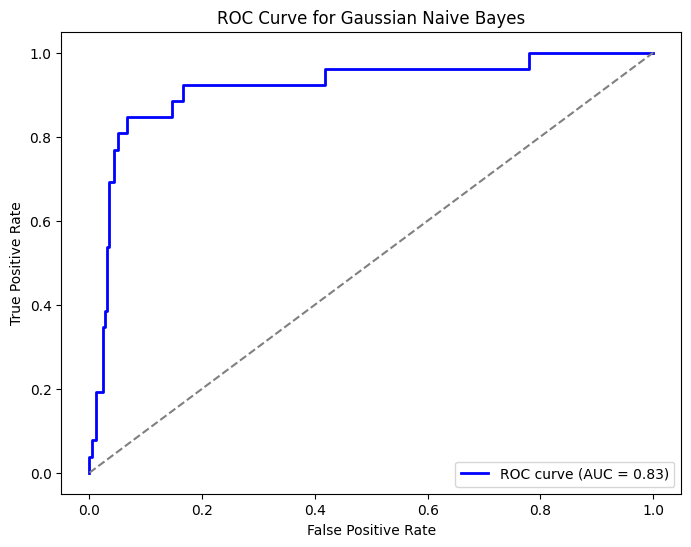

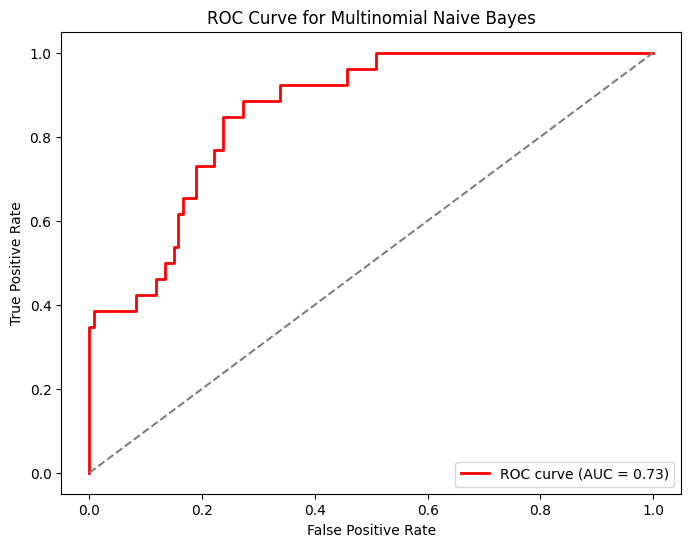

In [35]:
from sklearn.metrics import roc_curve, roc_auc_score

# ROC Curve for Gaussian Naive Bayes
fpr_gnb, tpr_gnb, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc_gnb = roc_auc_score(y_test, y_pred_gnb)
plt.figure(figsize=(8, 6))
plt.plot(fpr_gnb, tpr_gnb, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_gnb)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Gaussian Naive Bayes')
plt.legend(loc='lower right')
plt.show()

# ROC Curve for Multinomial Naive Bayes
fpr_mnb, tpr_mnb, _ = roc_curve(y_test, mnb.predict_proba(X_test)[:, 1])
roc_auc_mnb = roc_auc_score(y_test, y_pred_mnb)
plt.figure(figsize=(8, 6))
plt.plot(fpr_mnb, tpr_mnb, color='red', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_mnb)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multinomial Naive Bayes')
plt.legend(loc='lower right')
plt.show()


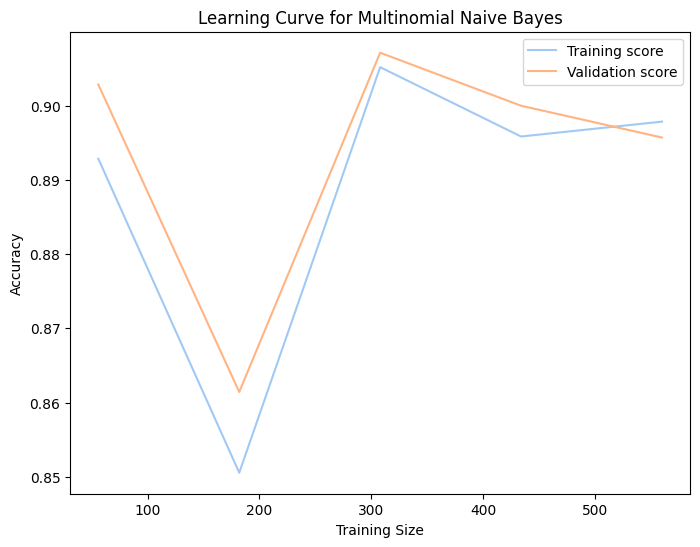

In [45]:
from sklearn.model_selection import learning_curve

# Calculate learning curve
train_sizes, train_scores, valid_scores = learning_curve(model, X, y, cv=5)

# Plot learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label="Training score")
plt.plot(train_sizes, np.mean(valid_scores, axis=1), label="Validation score")
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve for Multinomial Naive Bayes')
plt.legend()
plt.show()

#A learning curve helps you understand whether your model is underfitting or overfitting by 
#plotting training and validation performance as the number of training samples increases.